(50000, 32, 32, 3)
(10000, 32, 32, 3)
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.0441 - loss: 4.5605 - val_accuracy: 0.0939 - val_loss: 3.9371
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1183 - loss: 3.7503 - val_accuracy: 0.1856 - val_loss: 3.3282
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1816 - loss: 3.3520 - val_accuracy: 0.2169 - val_loss: 3.1624
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.2312 - loss: 3.0787 - val_accuracy: 0.2831 - val_loss: 2.8257
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.2645 - loss: 2.9045 - val_accuracy: 0.3154 - val_loss: 2.6887
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.2804 - loss: 2.7982 - val_accuracy: 0.3184 - val_loss: 2.6791
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3089 - loss: 2.6587 - val_accuracy: 0.3316 - val_loss: 2.5778
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - 

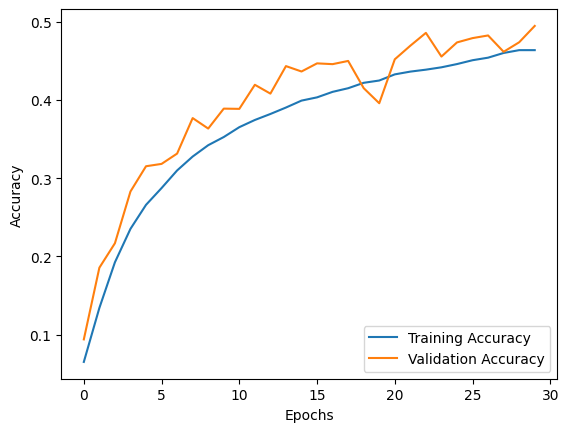

313/313 - 2s - 7ms/step - accuracy: 0.4949 - loss: 1.8823
Test Accuracy: 0.4948999881744385


In [56]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

print(train_images.shape)
print(test_images.shape)


train_labels = tf.keras.utils.to_categorical(train_labels, 100)
test_labels = tf.keras.utils.to_categorical(test_labels, 100)


model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(100, activation='softmax'))


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=30,
                    batch_size=64, validation_data=(test_images, test_labels))


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc}")
